In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# special matplotlib argument for improved plots
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

## Recall from from lab last week 09/26/2014

Previously discussed: 

* urllib2 - reads in HTML
* BeautifulSoup - use to parse HTML and XML code
    * Reddit
* JSON examples
    * World Cup

## Today, we will discuss the following:

* Random variables and probability distributions
* Central Limit Theorem (CLT)


<a href=https://raw.githubusercontent.com/cs109/2014/master/labs/Lab5_Notes.ipynb download=Lab5_Notes.ipynb> Download this notebook from Github </a>

---

Some notes extracted from [Mickey Atwal, Cold Spring Harbor Laboratory](http://nbviewer.ipython.org/url/atwallab.cshl.edu/teaching/distributions.ipynb)

# Random Variables and Probability Distributions

A [random variable](http://en.wikipedia.org/wiki/Random_variable) is a variable that takes on a set of possible values (**discrete** or **continuous**) and is subject to *randomness*. Each possible value the random variable can take on is associated with a probability.  The possible values the random variable can take on and the associated probabilities is known as [probability distribution](http://en.wikipedia.org/wiki/Probability_distribution).  

We will start by looking at a few probability distributions in in the `scipy.stats` [module](http://docs.scipy.org/doc/scipy/reference/stats.html). 

### Discrete distributions 

Discrete probability distributions are also known as [probability  mass functions](http://en.wikipedia.org/wiki/Probability_mass_function). Examples include the [Bernoulli distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution), the [binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution), the [Poisson distribution]() and the [geometric distribution](http://en.wikipedia.org/wiki/Geometric_distribution). 




#### Binomial

A random variable $X$ that has a binomial distribution represents the number of successes in a sequence of $n$ independent yes/no trials, each of which yields success with probability $p$. 

$$P(X = k) = \displaystyle \left(
\frac{n!}{k!(n-k)!}
\right)
p^k (1-p)^{n-k}$$


* E(X) = $np$, Var(X) = $np(1-p)$
* Example: what is the probability of getting 2 heads out of 10 flips of a fair coin?

In [4]:
# Let's look at the help file for the stats.binom function
# stats.binom?

In [5]:
n = 10
p = 0.3
k = np.arange(0,11) # plot all values between 0 and 10
y = stats.binom.pmf(k, n, p)
print y # P(X = k)

[  2.82475249e-02   1.21060821e-01   2.33474440e-01   2.66827932e-01
   2.00120949e-01   1.02919345e-01   3.67569090e-02   9.00169200e-03
   1.44670050e-03   1.37781000e-04   5.90490000e-06]


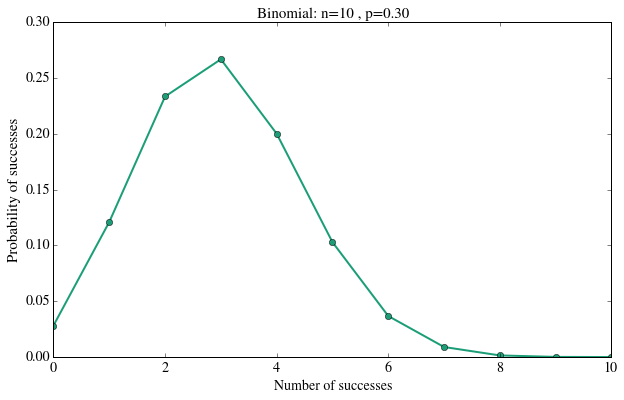

In [7]:
plt.plot(k, y, 'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p),fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize=15)
plt.show()

In [13]:
# your turn

# Try changing p to p = 0.6.
# Try plotting values values larger than 10.
y = stats.binom.pmf(k = np.arange(0, 15), n = 10, p = 0.6)
print y

[  1.04857600e-04   1.57286400e-03   1.06168320e-02   4.24673280e-02
   1.11476736e-01   2.00658125e-01   2.50822656e-01   2.14990848e-01
   1.20932352e-01   4.03107840e-02   6.04661760e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


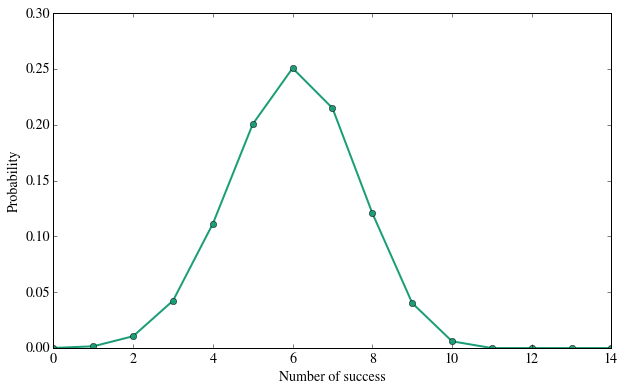

In [16]:
plt.plot(np.arange(0, 15), y, 'o-')
plt.xlabel('Number of success')
plt.ylabel('Probability')
plt.show()

Now let's simulate binomial random variables using `stats.binom.rvs`

In [17]:
# stats.binom?

Mean: 3.0091
SD: 1.46616


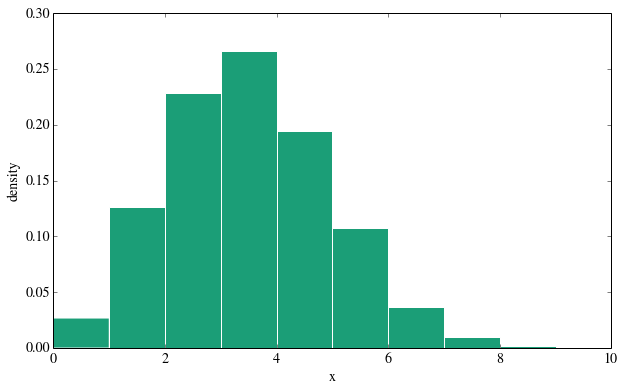

In [29]:
data = stats.binom.rvs(n = 10, p = 0.3, size = 10000)
print "Mean: %g" % np.mean(data)
print "SD: %g" % np.std(data, ddof=1)

plt.figure()
plt.hist(data, bins = 10, normed = True)
plt.xlabel("x")
plt.ylabel("density")
plt.show()

#### Poisson 

A random variable $X$ that has a Poisson distribution represents the number of events occurring in a fixed time interval with a rate parameters $\lambda$. 

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

* E(X) = $\lambda$, Var(X) = $\lambda$
* Example: what is probability of observing 4 accidents at an intersections in a day given the rate of accidents is 2 per day? 

In [19]:
# Let's look at the help file for the stats.binom function
# stats.poisson?

In [20]:
lam = 2 # rate parameter lambda
n = np.arange(0, 11)
y = stats.poisson.pmf(n, lam)
print y

[  1.35335283e-01   2.70670566e-01   2.70670566e-01   1.80447044e-01
   9.02235222e-02   3.60894089e-02   1.20298030e-02   3.43708656e-03
   8.59271640e-04   1.90949253e-04   3.81898506e-05]


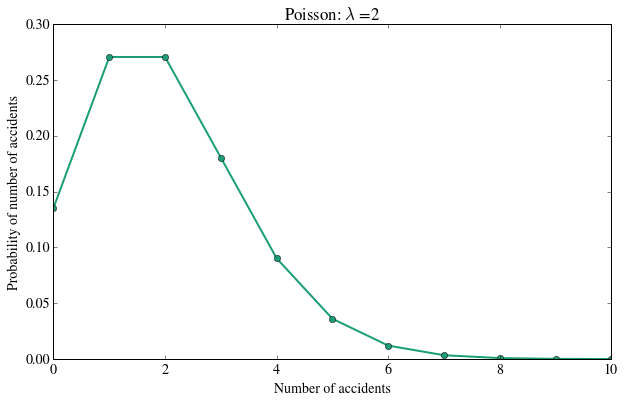

In [21]:
plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ =%i' % lam)
plt.xlabel('Number of accidents')
plt.ylabel('Probability of number of accidents')
plt.show()

In [28]:
# your turn

# try changing the rate parameters to 1. 
# Try changing the rate parameter to 8. 
# stats.poisson?
y = stats.poisson.pmf(np.arange(0, 15), mu = 1)
y_new = stats.poisson.pmf(np.arange(0, 15), mu = 8)

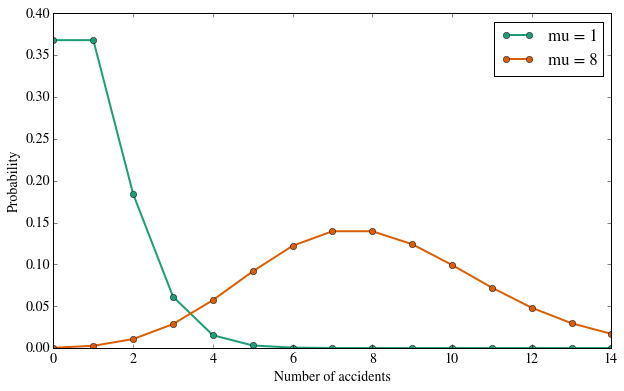

In [33]:
line_1, = plt.plot(np.arange(0, 15), y, 'o-', label = 'mu = 1')
line_8, = plt.plot(np.arange(0, 15), y_new, 'o-', label = 'mu = 8')
plt.legend(handles=[line_1, line_8])
plt.xlabel('Number of accidents')
plt.ylabel('Probability')
plt.show()

Now let's simulate Poisson random variables using `stats.poisson.rvs`

Mean: 2.007
SD: 1.41526


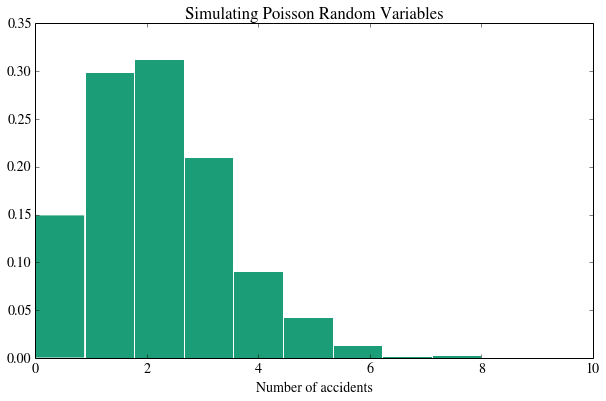

In [34]:
data = stats.poisson.rvs(mu = 2, loc = 0, size = 1000)
print "Mean: %g" % np.mean(data)
print "SD: %g" % np.std(data, ddof=1)

plt.figure()
plt.hist(data, bins = 9, normed = True)
plt.xlim(0, 10)
plt.xlabel("Number of accidents")
plt.title("Simulating Poisson Random Variables")
plt.show()

#### Continuous distributions

Continuous probability distributions also known as [probability density functions](http://en.wikipedia.org/wiki/Probability_density_function) are functions that take on continuous values (e.g. values on the real line). Examples include the [normal distribution](http://en.wikipedia.org/wiki/Normal_distribution), the [exponential distribution](http://en.wikipedia.org/wiki/Exponential_distribution) and the [beta distribution](http://en.wikipedia.org/wiki/Beta_distribution).  


#### Normal (or Gaussian)

The normal distribution is a continuous distribution or a function that can take on values anywhere on the real line. The normal distribution is parameterized by two parameters: the mean of the distribution $\mu$ and the variance $\sigma^2$.  

$$ P(x;\mu,\sigma)=\displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\displaystyle \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) },
\hspace{1in} x \in [-\infty;\infty] $$


* E(X) = $\mu$, Var(X) = $\sigma^2$
* This distribution appears as the large n limit of the binomial distribution which you saw in Homework 2 and the **Central Limit Theorem** which we will discuss in a little bit.

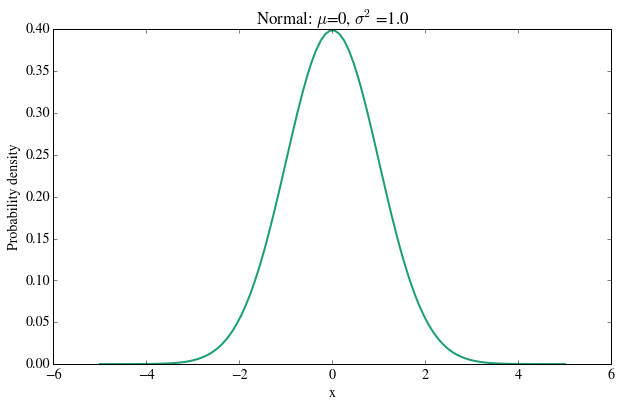

In [34]:
# your turn 
# plot the pdf of a normal distribution with mean = 0 and 
#    standard deviation = 1

mu = 0 # mean
sigma = 1 # standard deviation
x = np.linspace(-5,5,100)

y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.title('Normal: $\mu$=%.0f, $\sigma^2$=%.1f' % (mu, sigma))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

#### Beta 

The beta distribution is a continuous distribution which can take values between 0 and 1. This distribution is parameterized by two shape parameters $\alpha$ and $\beta$. 

$$P(x;\alpha,\beta)=\displaystyle \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}, \hspace{1in} x \in  [0;1], \hspace{0.1in} \alpha>0, \hspace{0.1in}\beta>0$$

* E(X) = $\displaystyle \frac{\alpha}{\alpha+\beta}$, Var(X) = $\displaystyle \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta +1)}$
* This distribution appears often in population genetics and Bayesian inference.

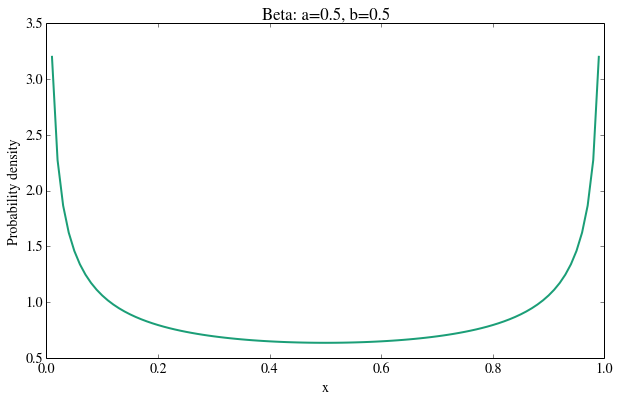

In [36]:
a = 0.5
b = 0.5
x = np.arange(0.01, 1, 0.01)
y = stats.beta.pdf(x, a, b)
plt.plot(x, y)
plt.title('Beta: a=%.1f, b=%.1f' % (a,b))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

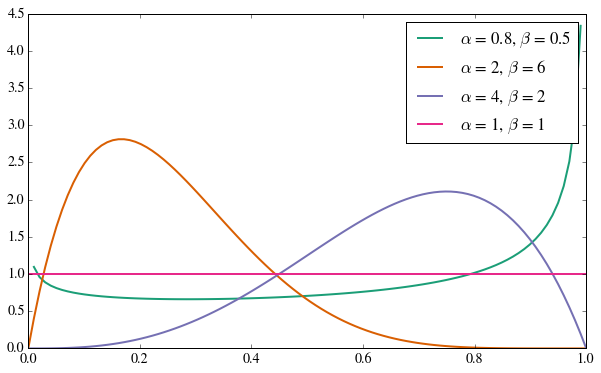

In [41]:
# your turn

# Try changing alpha = 0.8, beta = 0.5
# Try changing alpha = 2, beta = 6
# Try changing alpha = 4, beta = 2
# Try changing alpha = 1, beta = 1

x = np.linspace(0, 1, 100)
y1 = stats.beta.pdf(x, .8, .5)
y2 = stats.beta.pdf(x, 2, 6)
y3 = stats.beta.pdf(x, 4, 2)
y4 = stats.beta.pdf(x, 1, 1)
line1, = plt.plot(x, y1, label = r'$\alpha$ = 0.8, $\beta$ = 0.5')
line2, = plt.plot(x, y2, label = r'$\alpha$ = 2, $\beta$ = 6')
line3, = plt.plot(x, y3, label = r'$\alpha$ = 4, $\beta$ = 2')
line4, = plt.plot(x, y4, label = r'$\alpha$ = 1, $\beta$ = 1')
plt.legend(handles = [line1, line2, line3, line4])
plt.show()

In [ ]:
# What do you notice when alpha and beta are both less than 1 
#    compared to both bigger than 1? 

# The pdf becomes unimodal after both alpha and beta are bigger than 1.
# When both are equal to 1, it is essentially a uniform distribution.

#### Exponential 

The exponential distribution represents a process in which events occur continuously and independently at a constant average rate. 

$$P(x;\lambda)= \lambda e^{-\lambda x}, \hspace{1in} x \in [0,\infty], \hspace{0.1in} \lambda > 0$$

* E(X) = $1/\lambda$,  Var(X) = $1/\lambda^2$
* Example: The time to failure of a light bulb can be described by an exponential distribution with rate parameter $\lambda$

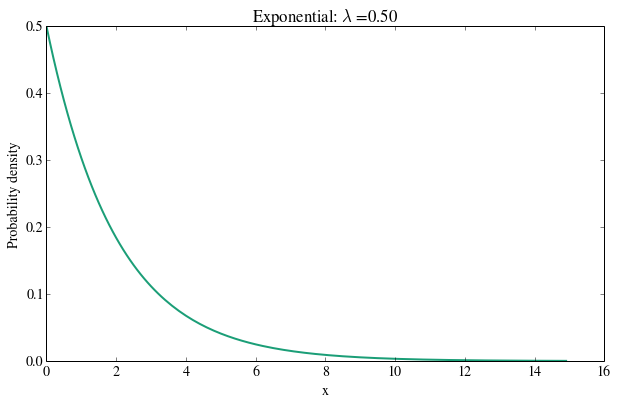

In [38]:
lam = 0.5
x = np.arange(0, 15, 0.1)
y = lam * np.exp(-lam * x) # could also use stats.expon.pdf
plt.plot(x, y)
plt.title('Exponential: $\lambda$ =%.2f' % lam)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

Now let's simulate exponential random variables using `stats.expon.rvs`

Mean: 2.0309
SD: 1.96152


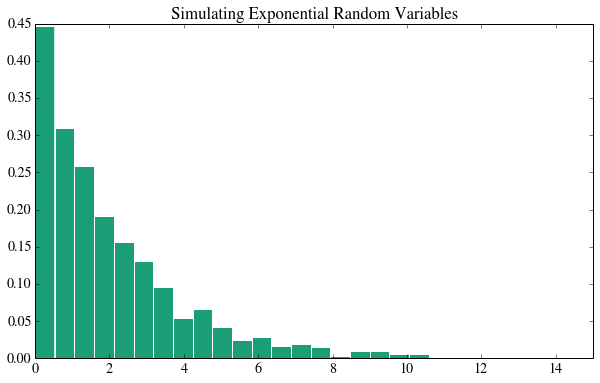

In [39]:
data = stats.expon.rvs(scale = 2, size = 1000)
print "Mean: %g" % np.mean(data)
print "SD: %g" % np.std(data, ddof=1)

plt.figure()
plt.hist(data, bins = 20, normed = True)
plt.xlim(0, 15)
plt.title("Simulating Exponential Random Variables")
plt.show()

#### Histogram of the means of datasets with 100 values

Now we will generate 1000 datasets each with 100 values drawn from an exponential distribution with $\lambda$ = 0.5. We will compute the mean of each dataset and store them in an array of length 1000. 

* Compute the mean of the means and the standard deviation of the means
    * Print them to the screen. 
* Draw a boxplot of the means
* Draw a histogram of the means

In [42]:
# Generate N = 1000 data sets of size 100 numbers drawn from an 
#    exponential distribution (lambda = 0.5)
data = stats.expon.rvs(scale=2, size = (1000, 100))
print data.shape

(1000, 100)


Sample size is:  1000
The mean of the means is:  2.00039674453
The standard deviation of the means is:  0.198634007901


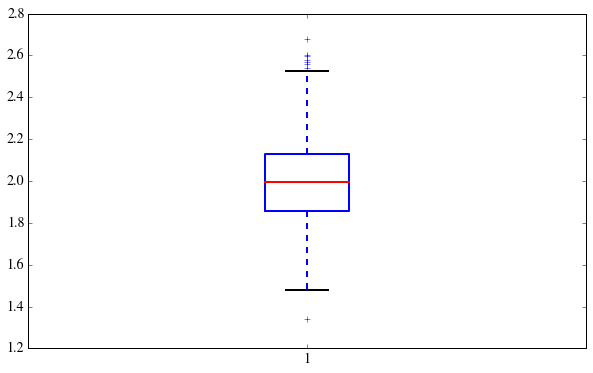

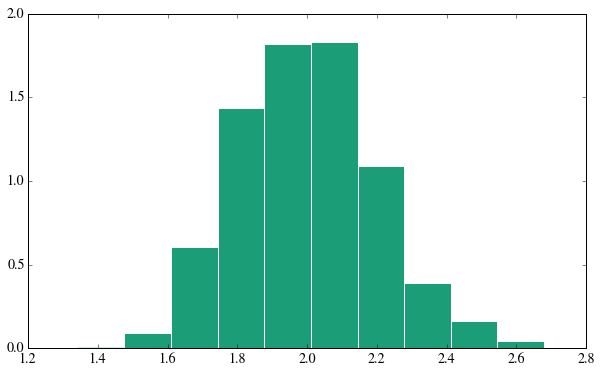

In [44]:
# Compute sample mean for each N datasets
sample_means = np.mean(data, axis = 1) # axis = 1 means row-wise mean

print 'Sample size is: ', sample_means.size
print 'The mean of the means is: ', np.mean(sample_means)
print 'The standard deviation of the means is: ', np.std(sample_means, ddof=1) 
plt.figure()
plt.boxplot(sample_means)
plt.figure()
plt.hist(sample_means, normed=True)
plt.show()

## Central Limit Theorem

> Take the mean of $n$ random samples $X_1, \ldots, X_n$ from ANY arbitrary distribution with a well defined standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the distribution of the sample mean $\bar{X}$ will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

The theorem states that the average (or sum) of a set of random measurements will tend to a bell-shaped curve no matter the shape of the original meaurement distribution. We can demonstrate the Central Limit Thereom in Python by sampling from the exponential distribution. 

We will generate $N$ datasets of $n$ = 20 numbers drawn from an exponential distribution with $\lambda = 1/2$. Then, we will draw a histogram of the sample means of the N datasets. 

On the same graph, draw the **pdf** of the normal distribution using the **mean of means** and **sample standard deviation of the mean**.  We will make 3 graphs, for $N$ = 100, 1000, 10000 and notice that the distribution starts to approach a Normal distribution.

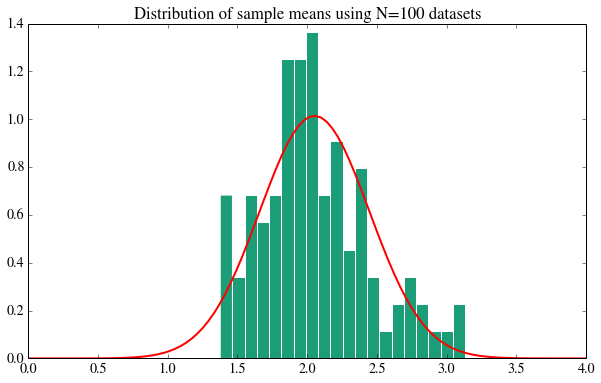

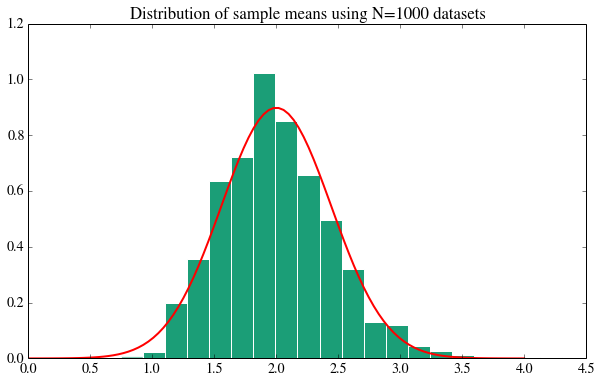

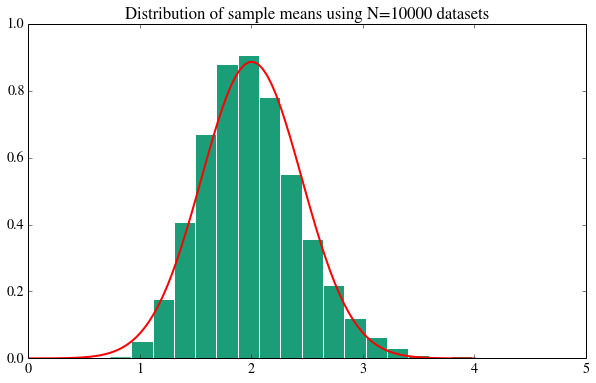

In [41]:
n = 20 
for N in [100, 1000, 10000]:
    data = stats.expon.rvs(scale = 2, size=(N, n))
    sample_means = np.mean(data, axis=1) 

    mu = np.mean(sample_means)
    sig = np.std(sample_means, ddof=1)

    plt.figure()
    plt.hist(sample_means, bins=20, normed=True)
    x = np.linspace(0, 4, 100)
    y = stats.norm.pdf(x, loc=mu, scale=sig)
    plt.plot(x, y, color = 'r')
    plt.title('Distribution of sample means using N=%i datasets' % N)

## Estimate variance as the number of data sets $N$ increases

The CLT states: 

>  Take the mean of $n$ random samples $X_1, \ldots, X_n$ from ANY arbitrary distribution with a well defined standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the distribution of the sample mean $\bar{X}$ will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

This means that if $X \sim Exponential(\lambda)$ where $\lambda$, then, 

$$ \bar{X} \sim Normal(\mu, \frac{\sigma^2}{n} ) $$

where $\mu = 1/\lambda$ and $\sigma^2 = 1/\lambda^2$

In [42]:
n = 100

for N in [100, 1000, 10000]:
    data = stats.expon.rvs(scale = 2, size=(N, n))
    sample_means = np.mean(data, axis=1) 

    mu = np.mean(sample_means)
    sig = np.std(sample_means, ddof=1)

    print 'Standard deviation of simulated distribution: %g' % sig
    print 'Standard deviation using CLT: %g' % np.sqrt( 4 / float(n))
    print 

Standard deviation of simulated distribution: 0.205547
Standard deviation using CLT: 0.2

Standard deviation of simulated distribution: 0.200937
Standard deviation using CLT: 0.2

Standard deviation of simulated distribution: 0.200404
Standard deviation using CLT: 0.2



# What happens if we increase $n$ and fix $N$? 

Now, generate $N = 1000$ datasets of $n$ numbers drawn from an exponential distribution with $\lambda = 1/2$. Then, we will draw a histogram of the sample means of the N datasets as $n$ varies from 10, 100, 1000. 

On the same graph, draw the **pdf** of the normal distribution using the **mean of means** and **sample standard deviation of the mean**.  We will make 3 graphs, for $n$ = 10, 100, 1000 and notice that the distribution starts to approach a Normal distribution.

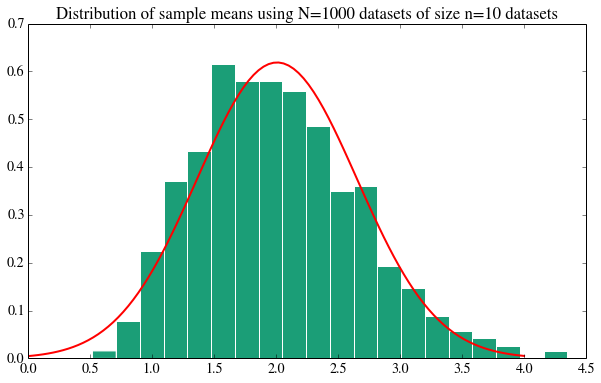

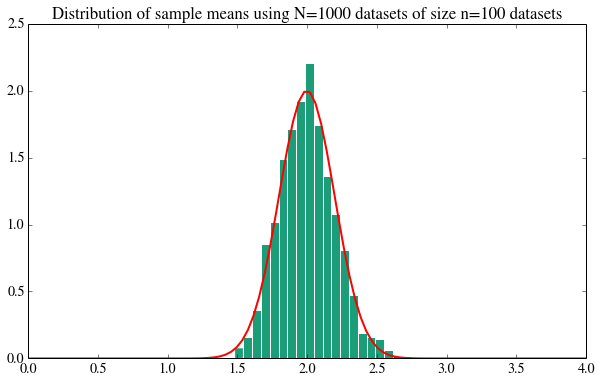

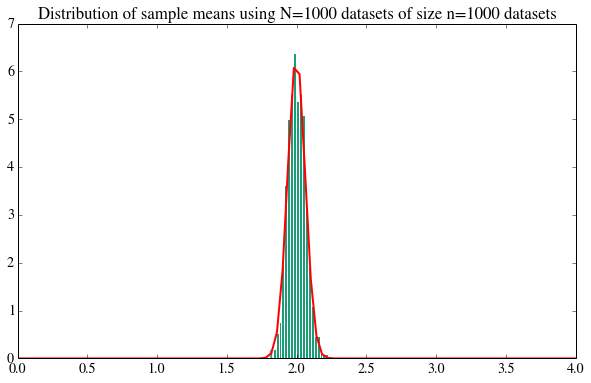

In [43]:
N = 1000 
for n in [10, 100, 1000]:
    data = stats.expon.rvs(scale = 2, size=(N, n))
    sample_means = np.mean(data, axis=1) 

    mu = np.mean(sample_means)
    sig = np.std(sample_means, ddof=1)

    plt.figure()
    plt.hist(sample_means, bins=20, normed=True)
    x = np.linspace(0, 4, 100)
    y = stats.norm.pdf(x, loc=mu, scale=sig)
    plt.plot(x, y, color = 'r')
    plt.title('Distribution of sample means using N=%i datasets of size n=%i datasets' % (N, n))

## Estimate variance of as the sample size $n$ increases

In [44]:
N = 1000

for n in [10, 100, 1000]:
    data = stats.expon.rvs(scale = 2, size=(N, n))
    sample_means = np.mean(data, axis=1) 

    mu = np.mean(sample_means)
    sig = np.std(sample_means, ddof=1)

    print 'Standard deviation of simulated distribution: %g' % sig
    print 'Standard deviation using CLT: %g' % np.sqrt( 4 / float(n))
    print 

Standard deviation of simulated distribution: 0.62856
Standard deviation using CLT: 0.632456

Standard deviation of simulated distribution: 0.197999
Standard deviation using CLT: 0.2

Standard deviation of simulated distribution: 0.0637199
Standard deviation using CLT: 0.0632456

